# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Data Acquisition and Cleaning

In [4]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Let's get the movie titles for our main dataset df

In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [26]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [29]:
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


Let's merge the df and movie_titles data frames so that the item_id column also gives the movie title

In [8]:
df_titles = pd.merge(df,movie_titles,on='item_id')

In [9]:
df_titles.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# 1. Exploratory Data Analysis (EDA)

Let's create a ratings data frame with average rating and number of ratings for each movie

These are the movies sorted by their average rating from the highest rating (5) to the lowest rating (1)

In [12]:
df_titles.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

These are the movies sorted by the number of ratings from highest to lowest

In [14]:
df_titles.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Just because a movie has a rating of 5 does not mean that it is an acclaimed movie. From the dataset, we can see that a fair number of movies have a rating of 5 from just one person or a small number of people. This clearly does not reflect the general public's perception of the movie. To curb this issue in our data, we should factor in the number of rating of each movie since a movie that has a rating of 5 from hundreds of people is more reflective of a movie's quality than a rating of 5 from just one person

We make a new ratings data frame with the average rating and number of ratings of each movie

In [17]:
ratings = pd.DataFrame(df_titles.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df_titles.groupby('title')['rating'].count())

In [18]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


With this new data frame, let's see the number of ratings and their frequency

Text(0, 0.5, 'Frequency')

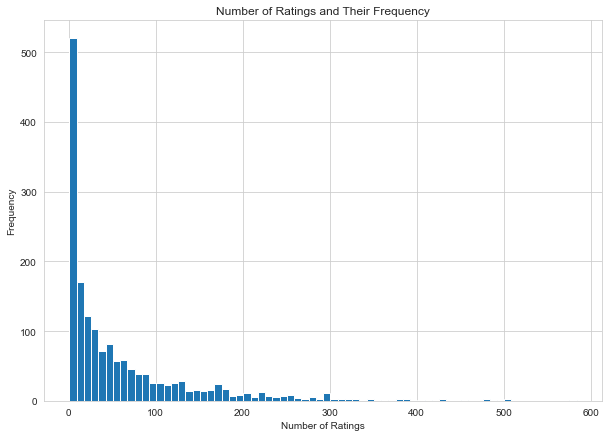

In [35]:
ratings['num of ratings'].hist(bins = 70, figsize = (10,7))
plt.title('Number of Ratings and Their Frequency')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

It looks like most movies do not have a rating or have a very small number of people rating them. Meanwhile, the number of movies with the highest number of ratings is small in comparison. This decreasing trend in the number of ratings makes sense since thousands of movies are released every year and only the most popular movies (e.g. movies with A-list actors, well known producers, big budgets, etc.) will typically be the movies where the majority of people watch.

Now let's see the actual rating and their frequency

Text(0, 0.5, 'Frequency')

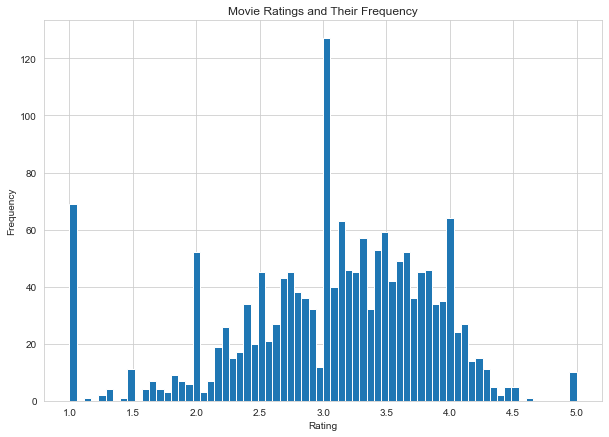

In [34]:
ratings['rating'].hist(bins = 70, figsize = (10,7))
plt.title('Movie Ratings and Their Frequency')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Most movie ratings seem to distributed around a rating range of 3.0-3.5. There are large, noticeable peaks at the integer valued ratings (1,2,3,4,5) and this is most likely due to single movie viewers leaving an integer valued rating. There a large number of rating 1 movies which is logical since it is likely that the majority of films produced every year are probably not highly acclaimed nor popular thus whatever few viewers that watch them give lower ratings. In a similar analysis,the small number of rating 5 movies is logical since few movies per year are considered big hits. However, we must also be aware that it could also be the case that some rating 5 movies with rated by a single viewer. Overall, the data is relatively normally distributed.

Now let's see the relationship between the number of ratings and the average rating of each movie

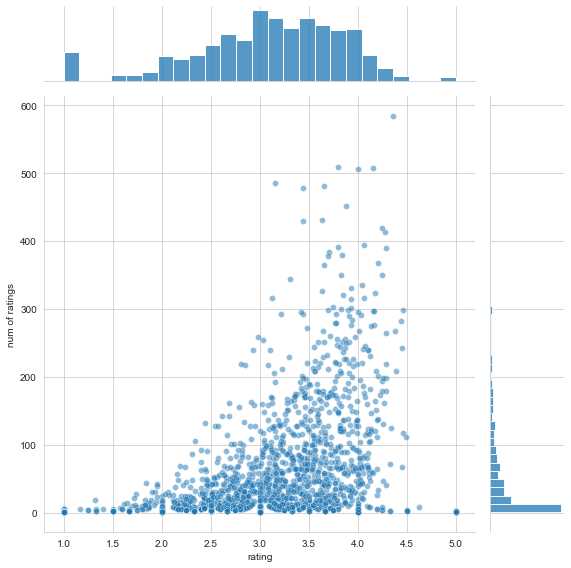

In [38]:
sns.jointplot(x = 'rating',y = 'num of ratings', data = ratings, alpha = 0.5, height=8)

We see that there is a clear trend in the actual rating and the number of ratings. Higher rated movies have a larger number of people viewing and rating them which logically makes sense since popular movies will attract more viewers. To support this further, the lower rated movies (1-2.5) have fewer viewers since movies that are not well-liked will not be well received by their viewers resulting in a lack of viewers. 